## Spike Challenge Precio
### Franco Betteo

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [2]:
%load_ext autoreload
%autoreload 2

### 1. Datos
TODO: better display

In [3]:
precipitaciones = pd.read_csv("precipitaciones.csv")
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [4]:
banco_central = pd.read_csv("banco_central.csv")
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


### 2. Análisis de datos. Creación de variables

In [5]:
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [6]:
precipitaciones_long = pd.melt(precipitaciones, id_vars="date", var_name="region", value_name="precipitaciones")

In [7]:
descripcion_precipitaciones = precipitaciones_long.groupby("region").agg({'date': ['min', 'max', 'count'],
                                                           'precipitaciones': ['min', 'max', 'mean', 'median', utils.count_na]
                                                            })
descripcion_precipitaciones.columns = ["_".join(pair) for pair in descripcion_precipitaciones.columns]
descripcion_precipitaciones.reset_index()                                                    

,region,date_min,date_max,date_count,precipitaciones_min,precipitaciones_max,precipitaciones_mean,precipitaciones_median,precipitaciones_count_na
0,Biobio,1979-01-01,2020-04-01,496,0.001170,702.434707,128.113406,79.558557,0
1,Coquimbo,1979-01-01,2020-04-01,496,0.000000,347.133889,16.154691,4.071036,0
2,La_Araucania,1979-01-01,2020-04-01,496,0.005331,661.211203,151.486456,110.570990,0
3,Libertador_Gral__Bernardo_O_Higgins,1979-01-01,2020-04-01,496,0.000000,645.515752,72.249805,25.995969,0
4,Los_Rios,1979-01-01,2020-04-01,496,0.748127,717.735673,199.451789,159.467940,0
5,Maule,1979-01-01,2020-04-01,496,0.000000,759.177712,98.662773,45.649888,0
6,Metropolitana_de_Santiago,1979-01-01,2020-04-01,496,0.000000,524.592667,49.666682,19.087592,0
7,Valparaiso,1979-01-01,2020-04-01,496,0.000000,441.048604,32.450980,9.037825,0


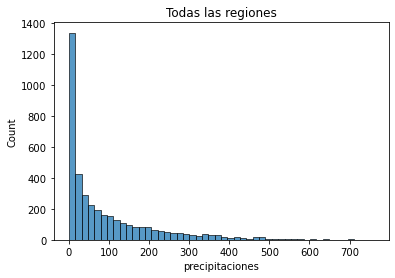

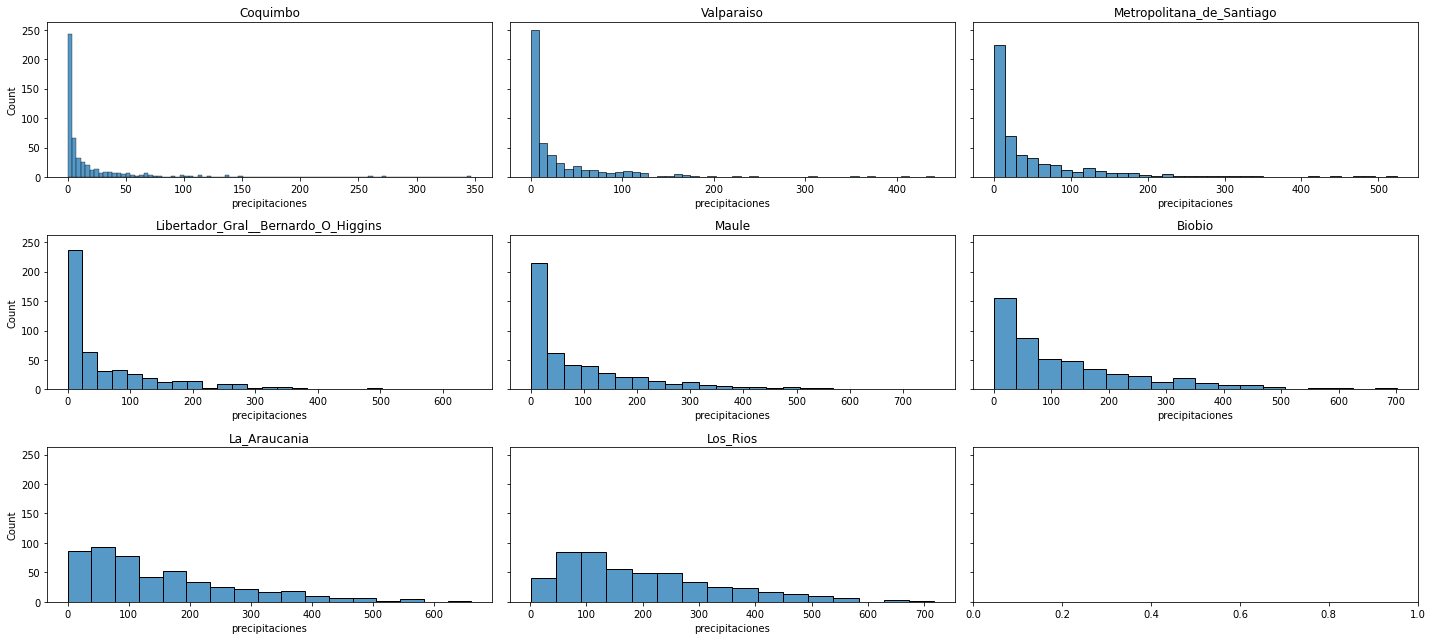

In [8]:
utils.plot_hist_precipitaciones(precipitaciones_long)
plt.title("Todas las regiones")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9), sharey=True)
ax = ax.flatten()

for i, region in enumerate(precipitaciones_long.region.unique()):
    utils.plot_hist_precipitaciones(precipitaciones_long, region=region, ax=ax[i])
    ax[i].set_title(region)
plt.tight_layout()

In [9]:
banco_central.shape

(614, 85)

In [10]:
banco_central_long = pd.melt(banco_central, id_vars="Periodo", var_name="variable", value_name="valor")

In [11]:
banco_central.apply([lambda x: x.min(skipna=False), 'max', 'mean', utils.count_na], 0)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
<lambda>,1970-01-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020-13-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39263.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26694.082759
count_na,0,314.0,314.0,314.0,313.0,314.0,313.0,314.0,314.0,314.0,...,194.0,470.0,242.0,530.0,254.0,350.0,530.0,530.0,529.0,469.000000


In [12]:
### SEGUIR ESTO
# Parece que segun el tipo de variable  el periodo con datos cambia.
# los numeros estan con punto separando miles
# solo 9 filas tienen todo completo


In [13]:
banco_central.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


In [14]:
banco_central.dropna().shape

(9, 85)

### 3. Visualizaciones

In [15]:
precipitaciones_long.query('region=="Metropolitana_de_Santiago"')

,date,region,precipitaciones
992,1989-02-01,Metropolitana_de_Santiago,0.028272
993,1998-10-01,Metropolitana_de_Santiago,0.011493
994,2001-02-01,Metropolitana_de_Santiago,0.002634
995,2008-11-01,Metropolitana_de_Santiago,0.015872
996,2009-04-01,Metropolitana_de_Santiago,0.009396
...,...,...,...
1483,1988-10-01,Metropolitana_de_Santiago,4.621711
1484,2019-08-01,Metropolitana_de_Santiago,4.509748
1485,2015-06-01,Metropolitana_de_Santiago,4.888708
1486,2016-09-01,Metropolitana_de_Santiago,1.066980


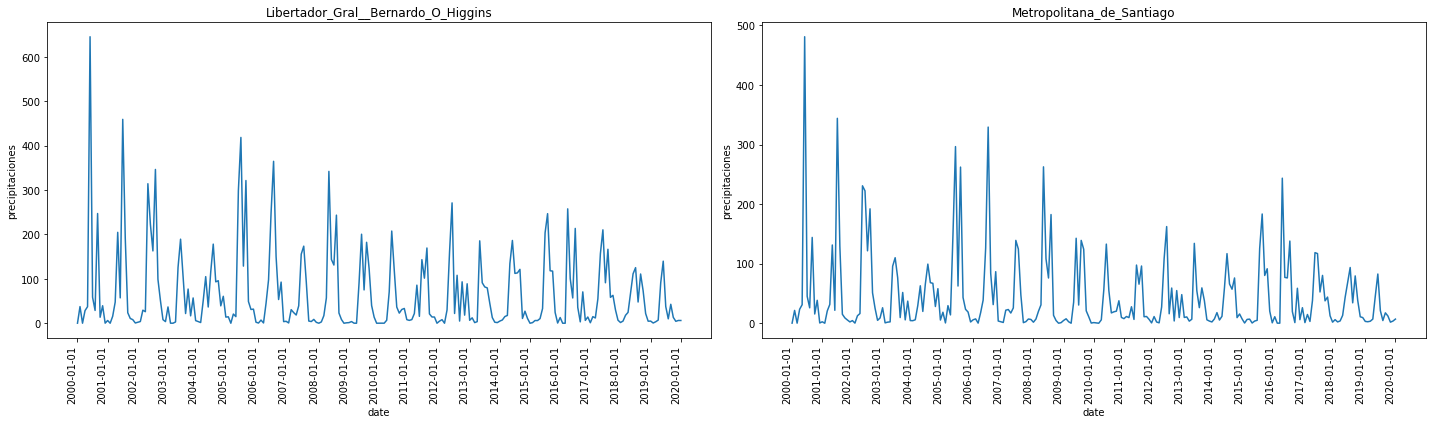

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax = ax.flatten()

for i, region in enumerate(['Libertador_Gral__Bernardo_O_Higgins', 'Metropolitana_de_Santiago']):
    utils.plot_line_precipitaciones(precipitaciones_long, region=region, desde="2000-01-01", hasta="2020-01-01", ax=ax[i])
    
fig.autofmt_xdate(rotation=90)
plt.tight_layout()

In [17]:
# Completar comentarios

In [18]:
precipitaciones_long.query('region=="Coquimbo"').sort_values('date')

,date,region,precipitaciones
170,1979-01-01,Coquimbo,2.641948
465,1979-02-01,Coquimbo,1.179804
305,1979-03-01,Coquimbo,0.255490
441,1979-04-01,Coquimbo,10.173699
217,1979-05-01,Coquimbo,1.039098
...,...,...,...
410,2019-12-01,Coquimbo,0.287895
38,2020-01-01,Coquimbo,3.299797
166,2020-02-01,Coquimbo,0.179216
7,2020-03-01,Coquimbo,0.003451
